In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [56]:
# This function calculates the time to peak mag
def find_mintime(y_vals, x_vals): 
    minmag = np.min(y_vals)
    minmag_index = int(np.argwhere(y_vals == minmag))

    return x_vals[minmag_index]

# This function finds the magnitude that is 1/4 of the peak magnitude
def find_onequarter_index(x_interp, y_interp, onequarter):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - onequarter) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

# This function finds the magnitude that is 3/4 of the peak magnitude
def find_threequarters_index(x_interp, y_interp, threequarters):
    good_xvals = np.array([])
    for i, xval in enumerate(x_interp):
        if np.abs(y_interp[i] - threequarters) < 0.05:
            good_xvals = np.append(good_xvals, xval)
    pre_peak = np.average(good_xvals[np.argwhere(good_xvals<mintime)[:]])
    post_peak = np.average(good_xvals[np.argwhere(good_xvals>mintime)[:]])
    return pre_peak, post_peak

# This function includes the last non-detection before the first detection
def include_nd(y_vals, x_vals, y_error, nd_y_vals, nd_x_vals):
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    y_error = np.array(y_error)
    nd_y_vals = np.array(nd_y_vals)
    nd_x_vals = np.array(nd_x_vals)

    nd_x_before_peak = nd_x_vals[nd_x_vals<x_vals[0]][-1]
    nd_y_before_peak = nd_y_vals[nd_x_vals<x_vals[0]][-1]
    x_vals = np.append(x_vals, nd_x_before_peak)
    y_vals = np.append(y_vals, nd_y_before_peak)

    order = np.argsort(x_vals)
    zero = np.zeros(1)
    y_error = np.append(y_error, zero)
    
    
    return x_vals[order], y_vals[order], y_error[order]

# This function finds the magnitude that is 25% and 75% of the peak magnitude
def find_onequarter_threequarters_mag(y_vals):
    minmag = np.min(y_vals)
    onequarter = minmag + -2.5*np.log10(0.25)
    threequarters = minmag + -2.5*np.log(0.75)
    return onequarter, threequarters

# This function finds the time between 25-75% of the peak magnitude
def find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals):
    time_pre = threequarters_indexpre - onequarter_indexpre
    time_post = onequarter_indexpost - threequarters_indexpost

    time = time_pre + time_post
    return time

In [79]:
# This function finds all the points needed to make a light curve plot in red filter 
def find_lightcurve_red(red_points, start, finish):
    x_vals = plotname['mjd'][red_points]-plotname['mjd'][0]
    y_vals = plotname['magpsf'][red_points]
    y_error = plotname['sigmapsf'][red_points]

    #defining first peak
    x_vals = x_vals[start:finish]
    y_vals = y_vals[start:finish]
    y_error = y_error[start:finish]
    
    # finding peak magnitude and its index
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    minmag = np.min(y_vals)
    mintime = find_mintime(y_vals, x_vals)

    # interpolating between data points
    x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
    y_interp = np.interp(x_interp, x_vals, y_vals)

    return x_vals, y_vals, y_error, x_interp, y_interp
    

# This function finds all the points needed to make a light curve plot in green filter
def find_lightcurve_green(green_points, start, finish):
    x_vals = plotname['mjd'][green_points]-plotname['mjd'][0]
    y_vals = plotname['magpsf'][green_points]
    y_error = plotname['sigmapsf'][green_points]

    #defining first peak
    x_vals = x_vals[start:finish]
    y_vals = y_vals[start:finish]
    y_error = y_error[start:finish]
    
    # finding peak magnitude and its index
    y_vals = np.array(y_vals)
    x_vals = np.array(x_vals)
    minmag = np.min(y_vals)
    mintime = find_mintime(y_vals, x_vals)

    # interpolating between data points
    x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
    y_interp = np.interp(x_interp, x_vals, y_vals)
    
    return x_vals, y_vals, y_error, x_interp, y_interp

In [72]:
CV_5 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21acaohjl_20220606\\detections_ZTF21acaohjl.csv")
plotname = CV_5

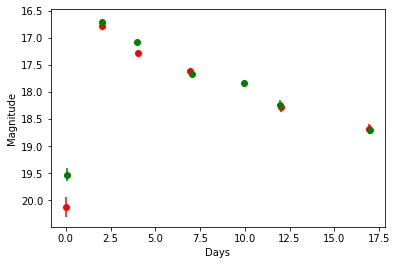

In [73]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

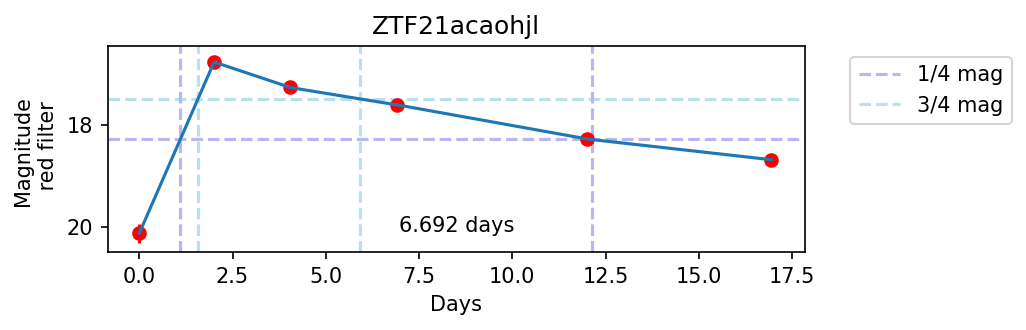

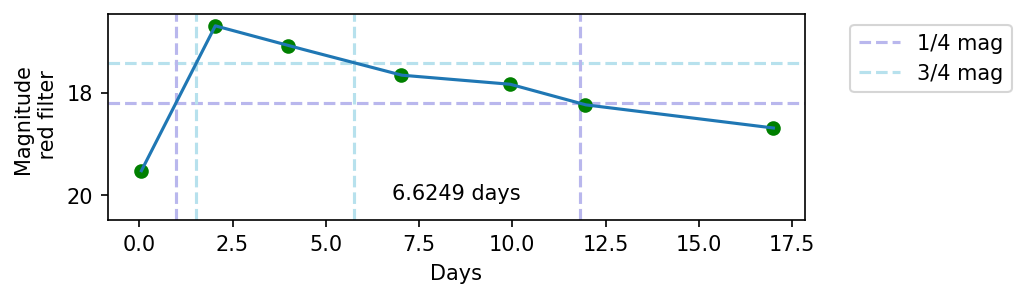

In [80]:
# red filter for CV 5

plotname = CV_5

red_points = plotname['fid']==2
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_red(red_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21acaohjl')


# green filter for CV 5

green_points = plotname['fid']==1
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_green(green_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
ax2.get_shared_x_axes().join(ax1,ax2)
ax2.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [41]:
CV_7 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF20aawbodq_20220606\\detections_ZTF20aawbodq.csv")
plotname = CV_7

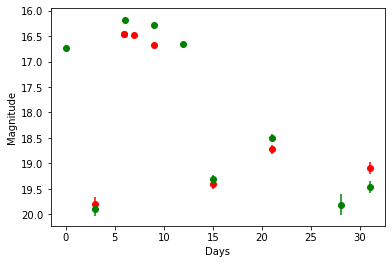

In [42]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

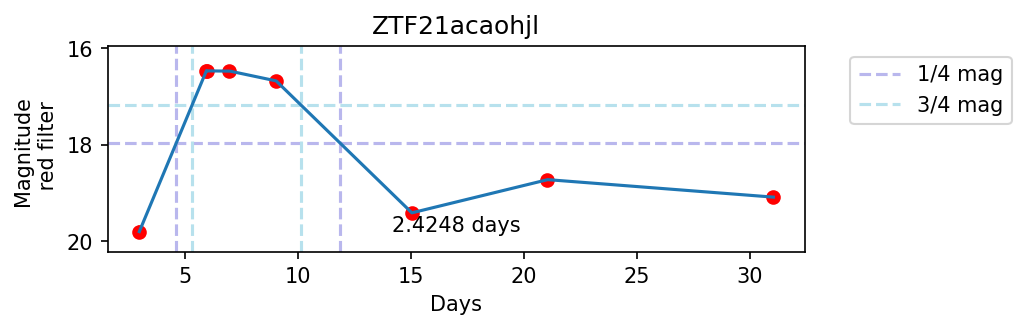

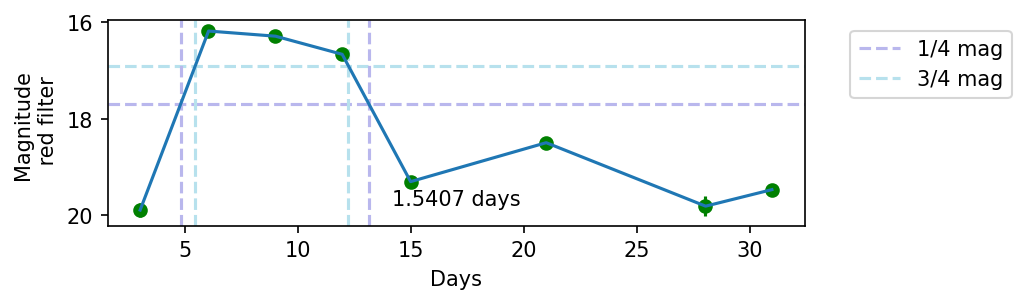

In [82]:
# red filter for CV 7

plotname = CV_7

red_points = plotname['fid']==2
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_red(red_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF20aawbodq')


# green filter for CV 7

green_points = plotname['fid']==1
start = 1
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_green(green_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
ax2.get_shared_x_axes().join(ax1,ax2)
ax2.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [83]:
CV_8 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19achbhfc_20220606\\detections_ZTF19achbhfc.csv")
plotname = CV_8

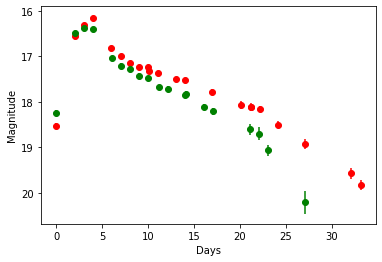

In [84]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

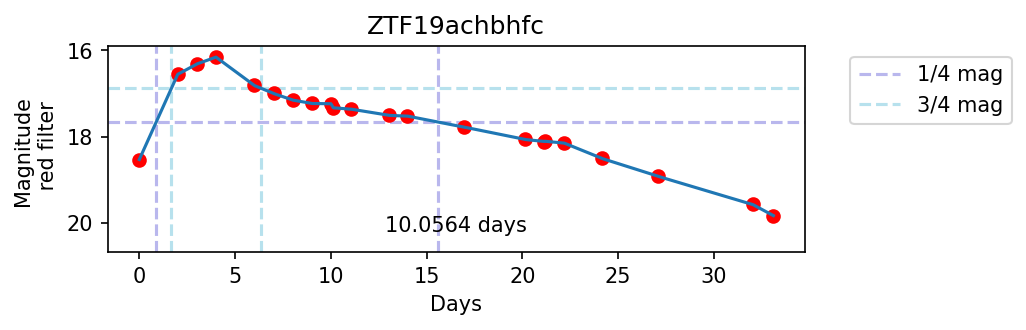

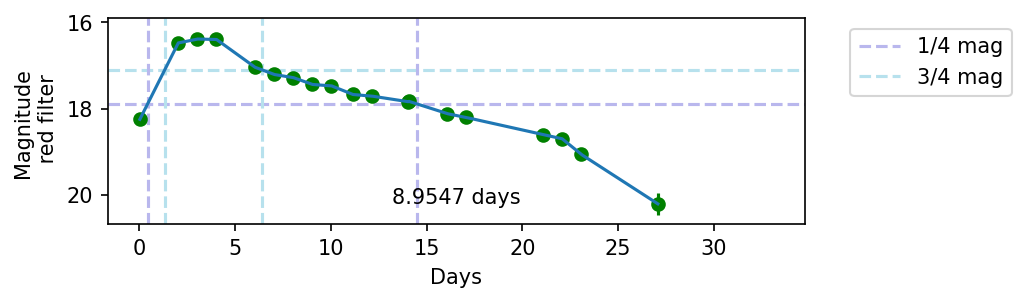

In [88]:
# red filter for CV 8

plotname = CV_8

red_points = plotname['fid']==2
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_red(red_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19achbhfc')


# green filter for CV 8

green_points = plotname['fid']==1
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_green(green_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
ax2.get_shared_x_axes().join(ax1,ax2)
ax2.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [89]:
CV_9 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF19abzipjc_20220606\\detections_ZTF19abzipjc.csv")
plotname = CV_9

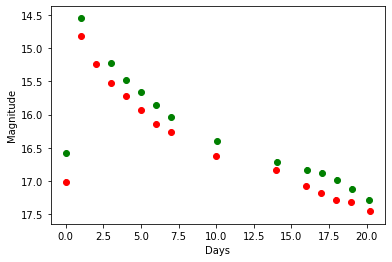

In [90]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

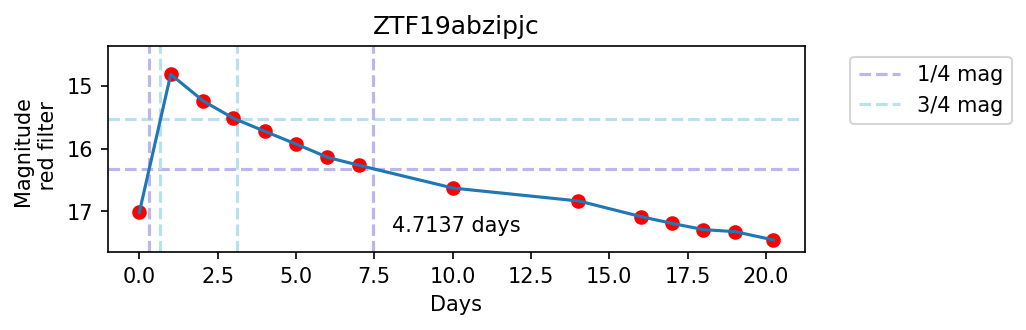

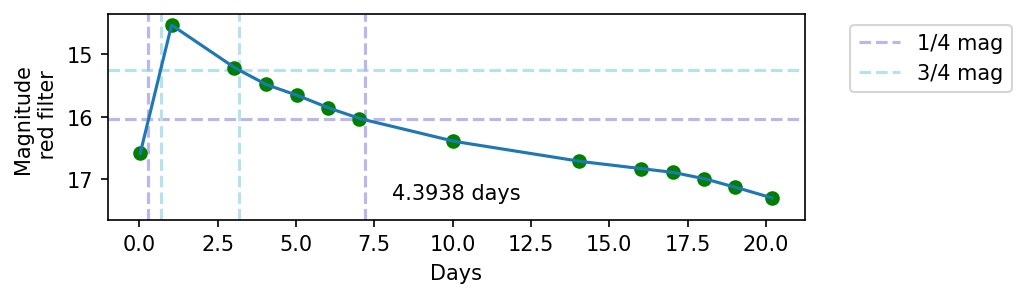

In [91]:
# red filter for CV 9

plotname = CV_9

red_points = plotname['fid']==2
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_red(red_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF19abzipjc')


# green filter for CV 9

green_points = plotname['fid']==1
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_green(green_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
ax2.get_shared_x_axes().join(ax1,ax2)
ax2.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [92]:
CV_11 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aahnvmo_20220616\\detections_ZTF22aahnvmo.csv")
plotname = CV_11

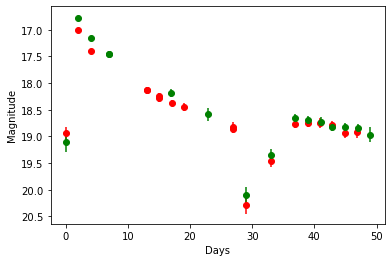

In [93]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

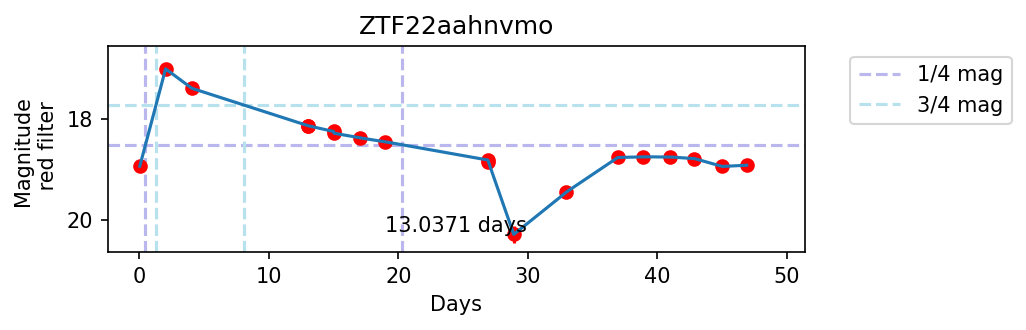

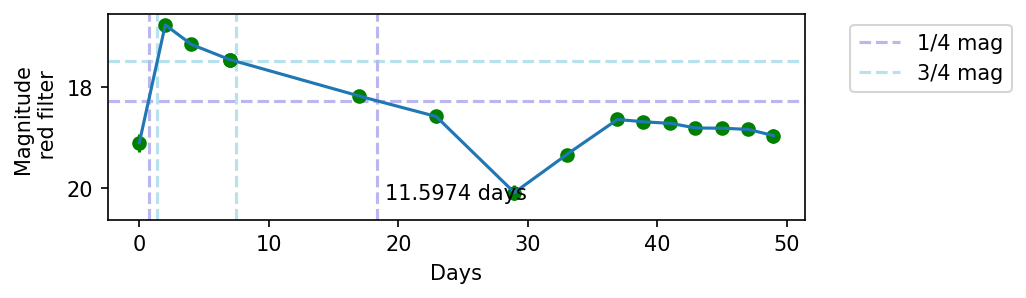

In [94]:
# red filter for CV 11

plotname = CV_11

red_points = plotname['fid']==2
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_red(red_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF22aahnvmo')


# green filter for CV 11

green_points = plotname['fid']==1
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_green(green_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
ax2.get_shared_x_axes().join(ax1,ax2)
ax2.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [95]:
CV_12 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF22aakzsrj_20220616\\detections_ZTF22aakzsrj.csv")
plotname = CV_12

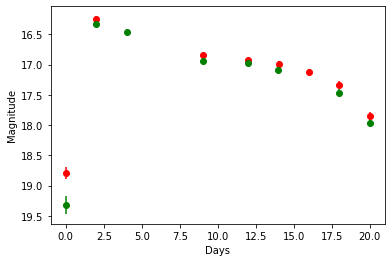

In [96]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

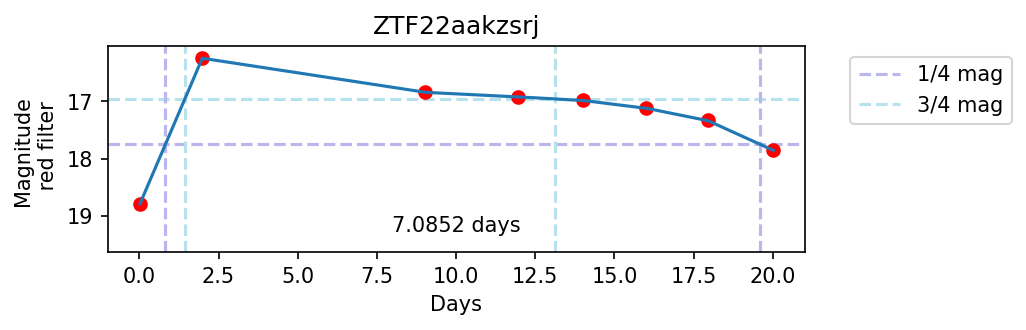

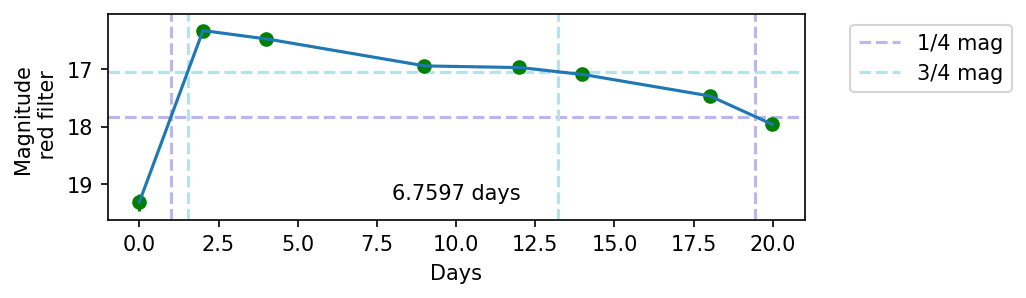

In [97]:
# red filter for CV 12

plotname = CV_12

red_points = plotname['fid']==2
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_red(red_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF22aakzsrj')


# green filter for CV 12

green_points = plotname['fid']==1
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_green(green_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
ax2.get_shared_x_axes().join(ax1,ax2)
ax2.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [98]:
CV_13 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21accyuff_20220616\\detections_ZTF21accyuff.csv")
plotname = CV_13

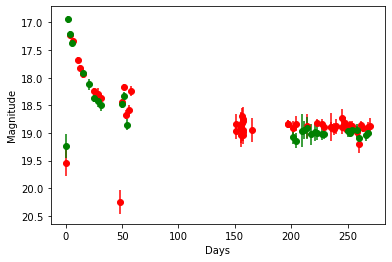

In [99]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

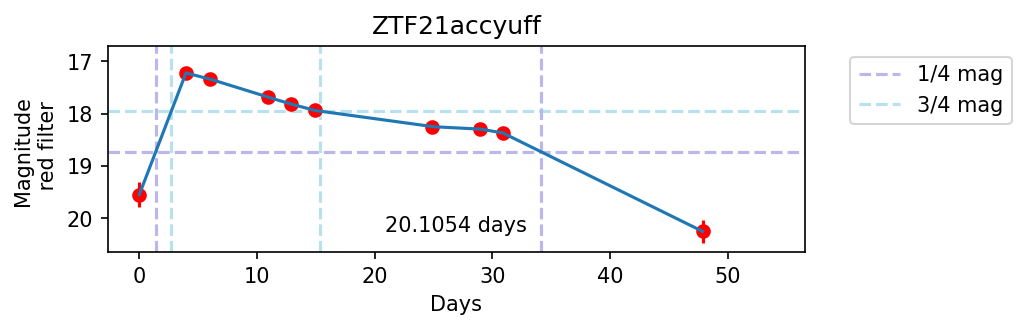

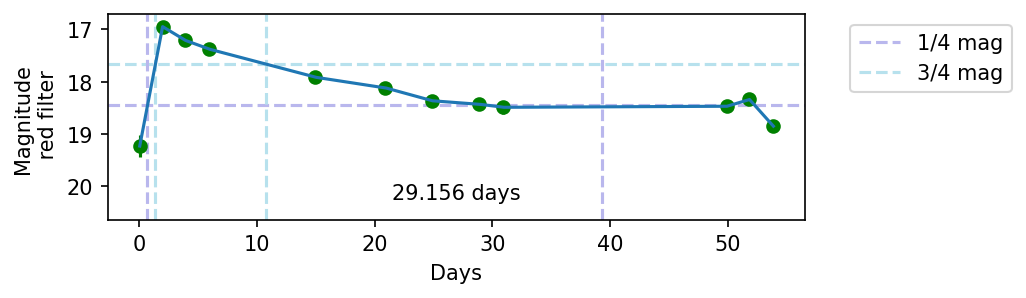

In [102]:
# red filter for CV 13

plotname = CV_13

red_points = plotname['fid']==2
start = 0
finish = 10

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_red(red_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21accyuff')


# green filter for CV 13

green_points = plotname['fid']==1
start = 0
finish = 12

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_green(green_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
ax2.get_shared_x_axes().join(ax1,ax2)
ax2.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [103]:
CV_14 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF21aazmjby_20220616\\detections_ZTF21aazmjby.csv")
plotname = CV_14

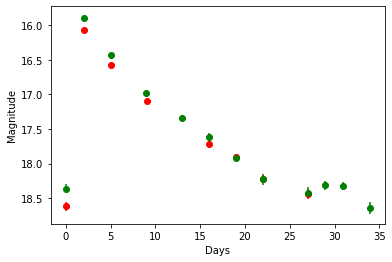

In [104]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

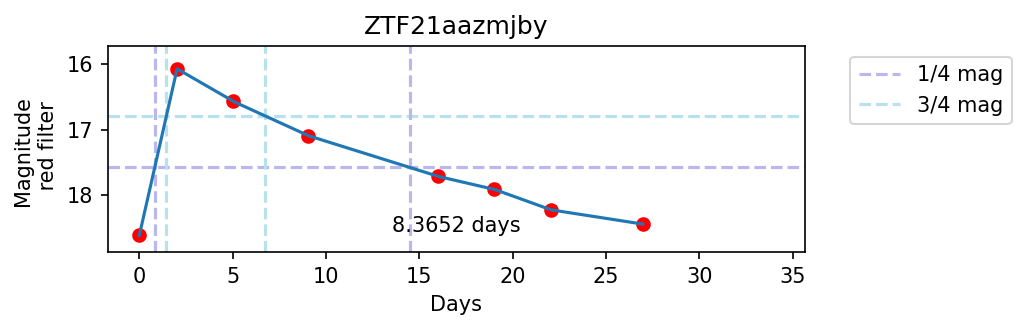

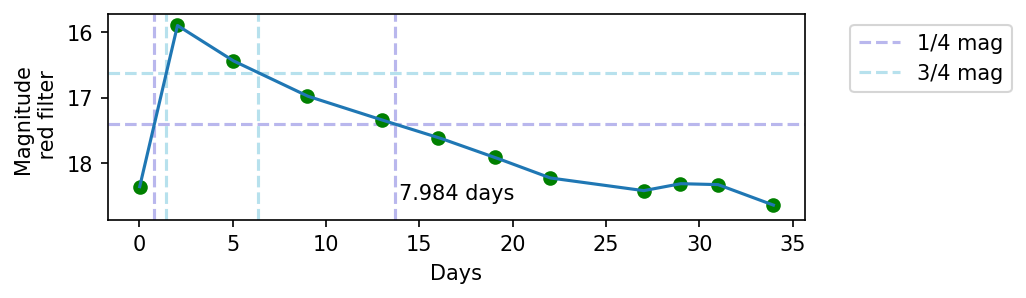

In [105]:
# red filter for CV 14

plotname = CV_14

red_points = plotname['fid']==2
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_red(red_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF21aazmjby')


# green filter for CV 14

green_points = plotname['fid']==1
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_green(green_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
ax2.get_shared_x_axes().join(ax1,ax2)
ax2.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()

In [106]:
CV_15 = pd.read_csv("C:\\Users\\marya\\Downloads\\ZTF18absnibc_20220616\\detections_ZTF18absnibc.csv")
plotname = CV_15

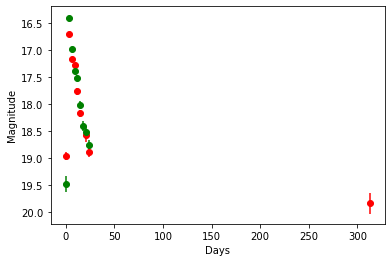

In [107]:
red_points = plotname['fid']==2
green_points = plotname['fid']==1
plt.errorbar(plotname['mjd'][red_points]-plotname['mjd'][0], plotname['magpsf'][red_points], plotname['sigmapsf'][red_points], c='red', fmt='o')
plt.errorbar(plotname['mjd'][green_points]-plotname['mjd'][0], plotname['magpsf'][green_points], plotname['sigmapsf'][green_points], c='green', fmt='o')
plt.xlabel("Days")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

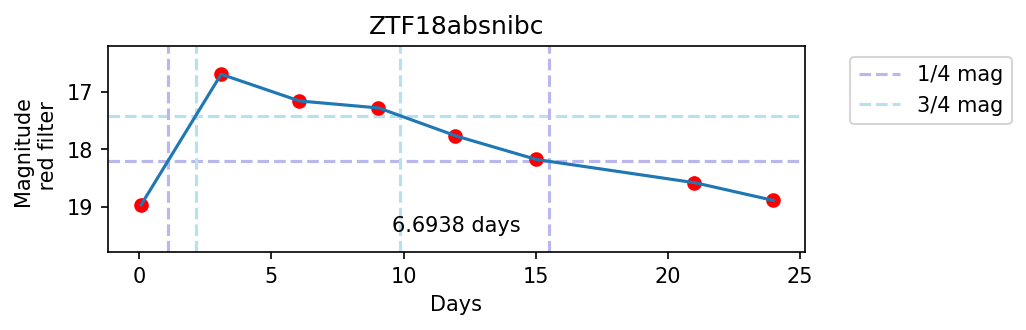

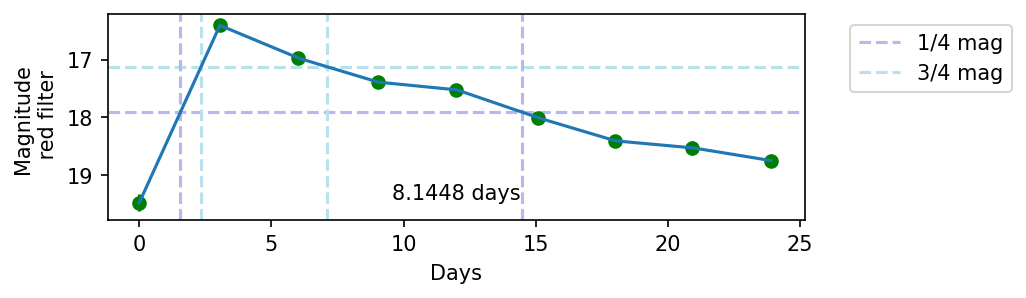

In [108]:
# red filter for CV 15

plotname = CV_15

red_points = plotname['fid']==2
start = 0
finish = 8

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_red(red_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)

# plot formatting
plt.figure(dpi=150)
ax1 = plt.subplot(2,1,1)
ax1.errorbar(x_vals, y_vals, y_error, c='red', fmt='o')

ax1.set_xlabel("Days")
ax1.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,1)
plt.gca().invert_yaxis()

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax1.errorbar(x_interp, y_interp)

ax1.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax1.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax1.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax1.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax1.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax1.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax1.text(0.5, 0.1, textstr, ha='center', transform=ax1.transAxes)
plt.title('ZTF18absnibc')


# green filter for CV 15

green_points = plotname['fid']==1
start = 0
finish = 50

# Points for light curve
x_vals, y_vals, y_error, x_interp, y_interp = find_lightcurve_green(green_points, start, finish)

# Find 25% and 75% of peak mag
mintime = find_mintime(y_vals, x_vals)
onequarter, threequarters = find_onequarter_threequarters_mag(y_vals)


# Find index of 25% and 75%
onequarter_indexpre, onequarter_indexpost = find_onequarter_index(x_interp, y_interp, onequarter)

threequarters_indexpre, threequarters_indexpost = find_threequarters_index(x_interp, y_interp, threequarters)

# Time between 25% - 75% magnitude
time = find_time_between_onequarterthreequarters(threequarters_indexpre, onequarter_indexpre, onequarter_indexpost, threequarters_indexpost, x_vals)
time = round(time, 4)


# plot formatting
plt.figure(dpi=150)
ax2 = plt.subplot(2,1,2)
ax2.errorbar(x_vals, y_vals, y_error, c='green', fmt='o')

ax2.set_xlabel("Days")
ax2.set_ylabel(f'Magnitude \n red filter')
plt.subplot(2,1,2)
plt.gca().invert_yaxis()
ax2.get_shared_x_axes().join(ax1,ax2)
ax2.get_shared_y_axes().join(ax1,ax2)

# interpolating between data points
x_interp = np.linspace(np.min(x_vals), np.max(x_vals), 10000)
y_interp = np.interp(x_interp, x_vals, y_vals)
ax2.errorbar(x_interp, y_interp)

ax2.axhline(float(onequarter), c='#b9b7ed', ls='--', label='1/4 mag')
ax2.axhline(float(threequarters), c='#b7e1ed', ls='--', label='3/4 mag')
ax2.axvline(float(onequarter_indexpre), c='#b9b7ed', ls='--')
ax2.axvline(float(onequarter_indexpost), c='#b9b7ed', ls='--')
ax2.axvline(float(threequarters_indexpre), c='#b7e1ed', ls='--')
ax2.axvline(float(threequarters_indexpost), c='#b7e1ed', ls='--')
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Adding text to plot
textstr = f'{time} days'
ax2.text(0.5, 0.1, textstr, ha='center', transform=ax2.transAxes)

plt.show()